In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/juliacorominasfont/Downloads/product_sales.csv')
df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
...,...,...,...,...,...,...,...,...
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey


# Data cleaning and validation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Only 'revenue' column has missing values and there are 1074 missing values. All data types are correct.

In [4]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [5]:
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [6]:
import re
df['sales_method'] = df['sales_method'].str.replace('em\s*\+\s*call', 'Email + Call', regex=True, flags=re.IGNORECASE).str.replace('email', 'Email', regex=True, flags=re.IGNORECASE)


In [7]:
df['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

Cleaning is needed to replace em + call and email with Email + Call and Email.

In [9]:
median_revenue = df['revenue'].median()
df['revenue'].fillna(median_revenue, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [11]:
df['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [12]:
df['state'].nunique()

50

In [13]:
df.shape

(15000, 8)

# Recap

The dataset contains 15000 rows and 8 columns before cleaning and validation. I have validated all columns against the criteria in the dataset table:

- **week**: Numeric values without missing values, same as the description. No cleaning is needed.
- **sales_method**: There are 5 unique values instead of 3 and no missing values. Cleaning is needed to replace em + call and email with Email + Call and Email, respectively. 
- **customer_id**: There are 1500 unique values that match the description given. There are no missing values. No changes are made to this column.
- **nb_sold**: Numeric values without missing values, same as the description. No cleaning is needed.
- **revenue**: Numeric values with 1074 missing values. All values are rounded to 2 decimal places and missing values are replaced with revenue's median.  
- **years_as_customer**: Numeric values without missing values, same as the description. No cleaning is needed. 
- **nb_site_visits**: Numeric values without missing values, same as the description. No cleaning is needed. 
- **state**: 50 unique values without missing values, same as the description. No cleaning is needed.

After the data validation, the dataset contains 15000 rows and 8 columns without missing values.

## How many customers were there for each approach?

In [14]:
df['sales_method'].value_counts(normalize=True) * 100

Email           49.773333
Call            33.080000
Email + Call    17.146667
Name: sales_method, dtype: float64

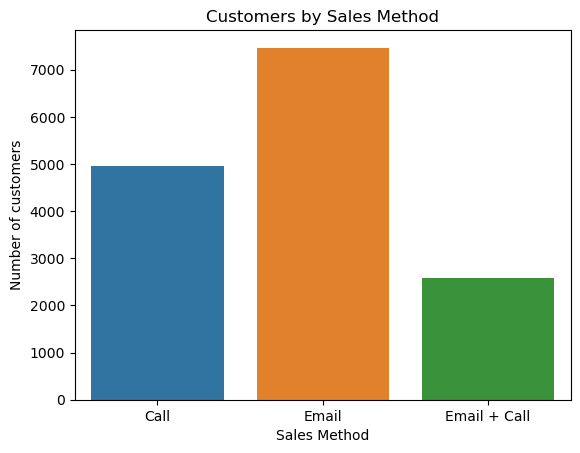

In [15]:
sns.countplot(x='sales_method', data=df, order=sorted(df['sales_method'].unique()))
plt.title("Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of customers")
plt.show()

From the last 6 weeks' record, the Email approach accounts for nearly half of the customer interactions. The second most utilized sales method is the Call, with the least used approach being the combination of the two (Email + Call). Also, we notice that the number of customers approached through Phone Calls nearly doubles the number of customers in the combined method.

Therefore, there is a significant difference between the number of customers for each method, which is worth noticing taking into account the difference in time spend by team members in each method.

## What does the spread of revenue look like?

We also want to analyze how the spread of revenue looks like overall. I was looking at the distribution of revenue. Most of the revenues fall under 150 and they reach a maximum of 238.30.

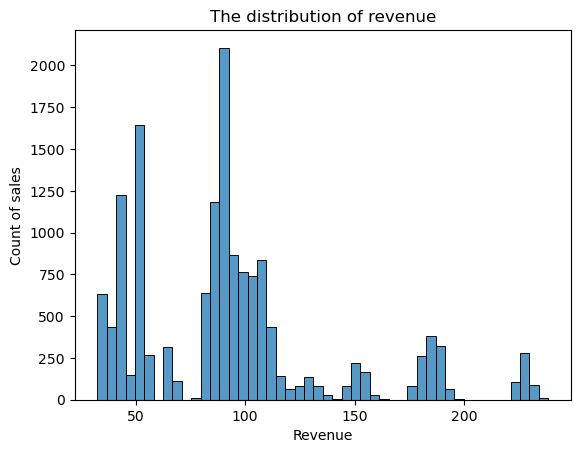

In [17]:
sns.histplot(data=df, x='revenue')
plt.title('The distribution of revenue')
plt.xlabel("Revenue")
plt.ylabel("Count of sales")
plt.show()

From the multiple boxplots below, we can see that the revenue range from sales obtained using the Email + Call method is more significant than for the other two methods. Although it is the less used approach, it stands out as having both the highest revenue and the widest interquartile range. This suggests that this approach is particularly effective in generating substantial sales, including all those sales exceeding 150 in revenue. 

In contrast, the Call method, even though it is the most time-consuming approach, exerts the least influence on revenue. Conversely, the Email method generates less revenue than the combined approach, but it comes with the advantage of being less time-consuming.

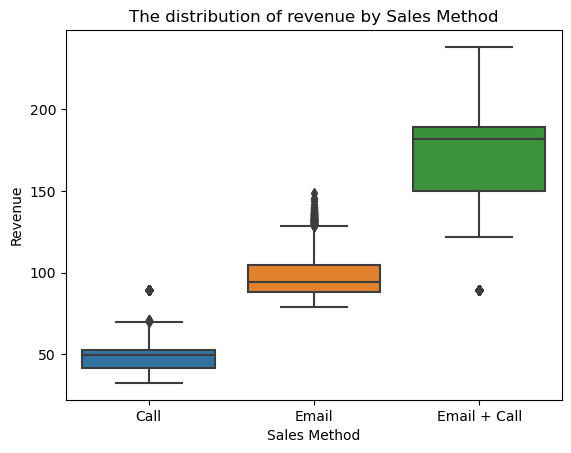

In [18]:
sns.boxplot(data=df, x='sales_method', y='revenue', order=sorted(df['sales_method'].unique()))
plt.title('The distribution of revenue by Sales Method')
plt.xlabel("Sales Method")
plt.ylabel("Revenue")
plt.show()

## Which method is better to use?

Since the goal is to use the best techniques to sell the new products effectively, we have to consider how every approach has contributed to the total sales. 

From the bar chart below, we see that the Email method is the one that accounts for more products sold, followed by the Call method and the Call approach.


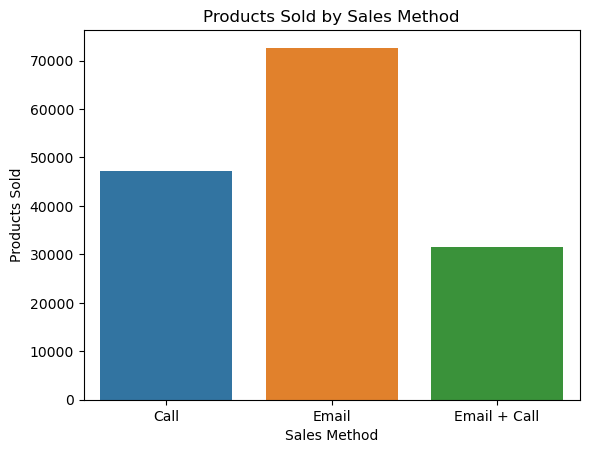

In [19]:
products_per_method = df.groupby('sales_method')['nb_sold'].sum().reset_index()
sns.barplot(data=products_per_method, x='sales_method', y='nb_sold', order=sorted(df['sales_method'].unique()))
plt.title('Products Sold by Sales Method')
plt.xlabel("Sales Method")
plt.ylabel("Products Sold")
plt.show()

In [20]:
total_products_sold = df['nb_sold'].sum()
df.groupby('sales_method')['nb_sold'].sum() / total_products_sold * 100

sales_method
Call            31.193892
Email           48.019435
Email + Call    20.786673
Name: nb_sold, dtype: float64

In contrast, if we focus on total revenue generated by each approach results differ. In this case, the Email is also the one that has contributed the most, accounting for more than half of the total revenue, but more importantly the revenue generated by the Email + Call approach is almost twice the revenue generated by the Call method.

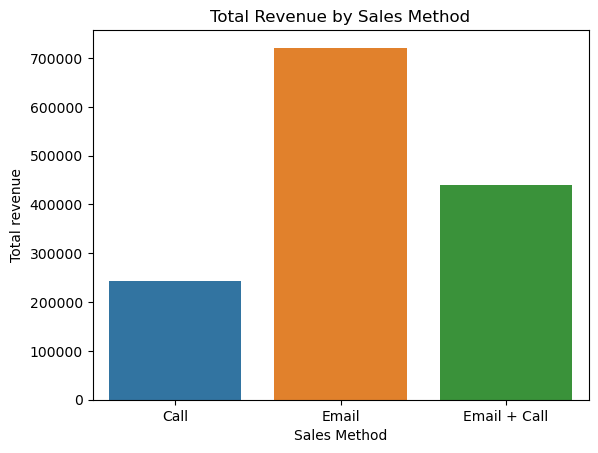

In [21]:
revenue_per_method = df.groupby('sales_method')['revenue'].sum().reset_index()
sns.barplot(data=revenue_per_method, x='sales_method', y='revenue', order=sorted(df['sales_method'].unique()))
plt.title('Total Revenue by Sales Method')
plt.xlabel("Sales Method")
plt.ylabel("Total revenue")
plt.show()

In [22]:
total_revenue = df['revenue'].sum()
df.groupby('sales_method')['revenue'].sum() / total_revenue * 100

sales_method
Call            17.358809
Email           51.344146
Email + Call    31.297044
Name: revenue, dtype: float64